In [1]:
import requests
import json
import time
import random
import pandas as pd

#下载第一页数据
def get_one_page(url):
    headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.140 Safari/537.36'
    }
    response = requests.get(url,headers=headers)
    if response.status_code == 200:                                      #页面正常响应
        return response.text                                             #返回页面源代码
    return None

#初始化表格的列对应的列表
commentId=[]
nickname=[]
userId=[]
content=[]
likedCount=[]

#解析第一页数据
def parse_ono_page(html):
    data = json.loads(html)['comments']                                   #评论以json形式存储,故以json形式截取
    for item in data:
        commentId.append(item['commentId']),                              #评论id
        nickname.append(item['user']['nickname']),                        #评论用户的昵称
        userId.append(item['user']['userId']),                            #评论用户的id
        content.append(item['content']),                                  #评论内容
        likedCount.append(item['likedCount'])                             #点赞数

#保存数据到文本文档
def save_to_txt():
    for i in range(1, 100):
        #网易云音乐评论的 api 结构：http://music.163.com/api/v1/resource/comments/R_SO_4_歌曲ID?limit=每页展示评论数量&offset=(页数-1)*20
        url='http://music.163.com/api/v1/resource/comments/R_SO_4_1311319037?limit=20&offset=' + str(20*(i-1))
        html = get_one_page(url)
        print('正在保存第%d页.'% i)
        parse_ono_page(html)
        #不定期睡眠 
        time.sleep(5 + float(random.randint(1,100)) /20) 
if __name__ =='__main__':
    save_to_txt()
donnotcry = {'commentId': commentId, 'nickname': nickname, 'userId': userId, 'content': content, 'likedCount':likedCount}#存成字典
donnotcry = pd.DataFrame(donnotcry, columns=['commentId', 'nickname', 'userId', 'content','likedCount'])                 #变成表格
donnotcry.to_csv("donnotcry.csv",encoding="utf_8_sig",index = False)                                                     #存成csv文件

正在保存第1页.
正在保存第2页.
正在保存第3页.
正在保存第4页.
正在保存第5页.
正在保存第6页.
正在保存第7页.
正在保存第8页.
正在保存第9页.
正在保存第10页.
正在保存第11页.
正在保存第12页.
正在保存第13页.
正在保存第14页.
正在保存第15页.
正在保存第16页.
正在保存第17页.
正在保存第18页.
正在保存第19页.
正在保存第20页.
正在保存第21页.
正在保存第22页.
正在保存第23页.
正在保存第24页.
正在保存第25页.
正在保存第26页.
正在保存第27页.
正在保存第28页.
正在保存第29页.
正在保存第30页.
正在保存第31页.
正在保存第32页.
正在保存第33页.
正在保存第34页.
正在保存第35页.
正在保存第36页.
正在保存第37页.
正在保存第38页.
正在保存第39页.
正在保存第40页.
正在保存第41页.
正在保存第42页.
正在保存第43页.
正在保存第44页.
正在保存第45页.
正在保存第46页.
正在保存第47页.
正在保存第48页.
正在保存第49页.
正在保存第50页.
正在保存第51页.
正在保存第52页.
正在保存第53页.
正在保存第54页.
正在保存第55页.
正在保存第56页.
正在保存第57页.
正在保存第58页.
正在保存第59页.
正在保存第60页.
正在保存第61页.
正在保存第62页.
正在保存第63页.
正在保存第64页.
正在保存第65页.
正在保存第66页.
正在保存第67页.
正在保存第68页.
正在保存第69页.
正在保存第70页.
正在保存第71页.
正在保存第72页.
正在保存第73页.
正在保存第74页.
正在保存第75页.
正在保存第76页.
正在保存第77页.
正在保存第78页.
正在保存第79页.
正在保存第80页.
正在保存第81页.
正在保存第82页.
正在保存第83页.
正在保存第84页.
正在保存第85页.
正在保存第86页.
正在保存第87页.
正在保存第88页.
正在保存第89页.
正在保存第90页.
正在保存第91页.
正在保存第92页.
正在保存第93页.
正在保存第94页.
正在保存第95页.
正在保存第96页.
正在保存第97页.
正在保存第98页.
正在保存第99页.


### 爬取《不哭》的网易云评论
1. 了解网易云评论的api结构，验证是否可用：http://music.163.com/api/v1/resource/comments/R_SO_4_歌曲ID?limit=每页展示评论数量&offset=(页数-1)*20
![JSON代码.JPG](https://i.loli.net/2018/11/06/5be0d7d3a5ceb.jpg)
2. 拿某一页的 JSON 数据，美化后研究它的结构
![JSON格式化.JPG](https://i.loli.net/2018/11/06/5be0d825d7132.jpg)
3. 需要评论ID、用户ID、评论用户昵称、评论内容、点赞数
4. 分页爬取并储存在donnotcry.csv文件中

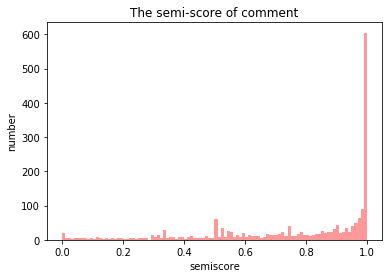

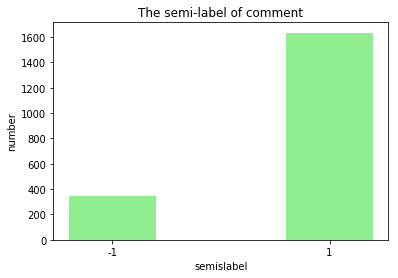

In [7]:
#自然语言处理带情感分析的包 SnowNLP
from snownlp import SnowNLP
data = pd.read_csv("donnotcry.csv",lineterminator='\n')                                                    #读取 csv 数据
data["semiscore"] = data['content'].apply(lambda x: SnowNLP(x).sentiments)                                 #为评论的情感倾向打分
data['semilabel'] = data["semiscore"].apply(lambda x: 1 if x>0.5 else -1)                                  #大于1为正向积极
#导入统计和绘图工具
import numpy as np
import matplotlib.pyplot as plt
#绘制总体情感倾向得分频数分布图
plt.hist(data["semiscore"], bins = np.arange(0, 1.01, 0.01),label="semisocre", color="#ff9999")            #绘图样式选择
plt.xlabel("semiscore")                                                                                    #得分做x轴
plt.ylabel("number")                                                                                       #出现的频数做y轴
plt.title("The semi-score of comment")
plt.show()

#绘制情感倾向0-1分布图
semilabel = data["semilabel"].value_counts()
plt.bar(semilabel.index,semilabel.values,tick_label=semilabel.index,color='#90EE90')                       #绘图样式选择
plt.xlabel("semislabel")                                                                                   #正向还是负向倾向做x轴
plt.ylabel("number")                                                                                       #频数做y轴
plt.title("The semi-label of comment")  
plt.show()
#绘制评论词云
import jieba                                                                                               #分词包
comment=''.join(data['content'])
wordlist = jieba.cut(comment, cut_all=False)                                                              #粒度较大的分词 
#过滤点单个字
stopwords_chinese = [line.strip() for line in open('stopwords_chinese.txt',encoding='UTF-8').readlines()] #文件下载地址：https://raw.githubusercontent.com/dongxiexidian/Chinese/master/stopwords.dat
word_list=[]
for seg in wordlist:
    if seg not in stopwords_chinese:
        word_list.append(seg)
#按频率排序
word_list=pd.DataFrame({'comment':word_list})
word_rank = word_list["comment"].value_counts()

#绘图、导出
from pyecharts import WordCloud
wordcloud_chinese = WordCloud(width=1500, height=820)
wordcloud_chinese.add("", word_rank.index[0:100], word_rank.values[0:100], word_size_range=[20, 200], is_more_utils=True)
wordcloud_chinese.render("comment.html")


### 数据可视化分析
1. 导入相应的包
2. 进行文本的预处理
3. 使用包进行绘图
4. 分别对评论素材做了两个情感倾向分析和词云分析
![词云.JPG](https://i.loli.net/2018/11/06/5be0d8e6e7f12.jpg)